In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
import seaborn as sns


In [2]:
raw_data = pd.read_csv('Housing.csv')
data = raw_data.copy()
raw_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
raw_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
raw_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

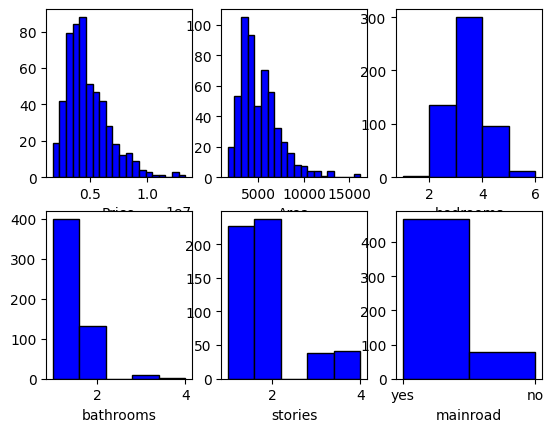

In [6]:
plt.subplot(2,3,1)
plt.hist(data['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Price')

plt.subplot(2,3,2)
plt.hist(data['area'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Area')

plt.subplot(2,3,3)
plt.hist(data['bedrooms'], bins=5, color='blue', edgecolor='black')
plt.xlabel('bedrooms')

plt.subplot(2,3,4)
plt.hist(data['bathrooms'], bins=5, color='blue', edgecolor='black')
plt.xlabel('bathrooms')

plt.subplot(2,3,5)
plt.hist(data['stories'], bins=5, color='blue', edgecolor='black')
plt.xlabel('stories')

plt.subplot(2,3,6)
plt.hist(data['mainroad'], bins=2, color='blue', edgecolor='black')
plt.xlabel('mainroad')

plt.show()

In [7]:
#function to remove outliers based on IQR method. 
# def remove_outliers_iqr(df, columns):
#     """
#     Remove outliers using Interquartile Range (IQR) method
    
#     Parameters:
#     df (pandas.DataFrame): Input dataframe
#     columns (list): Columns to check for outliers
    
#     Returns:
#     pandas.DataFrame: Dataframe with outliers removed
#     """
#     df_cleaned = df.copy()
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         df_cleaned = df_cleaned[
#             (df_cleaned[col] >= lower_bound) & 
#             (df_cleaned[col] <= upper_bound)
#         ]
    
#     return df_cleaned

In [8]:
# #removing outliers
# columns = ['price', 'area']
# data = remove_outliers_iqr(data, columns)
# data

In [9]:
# df_all = pd.concat([data, raw_data]).drop_duplicates(keep=False)
# df_all


In [10]:
# investigating Skewness:
skewness_price = skew(data['price'])
skewness_are = skew(data['area'])

print(f"Price Skewness: {skewness_price}")
print(f"Area Skewness: {skewness_are}")

Price Skewness: 1.2088998457878217
Area Skewness: 1.3175492613408553


In [11]:
# fixing skewness by log transformation
data['price'] = np.log(data['price'])
data['area'] = np.log(data['area'])

In [12]:
# fixing skewness by SQRT transformation
# data['price'] = np.sqrt(data['price'])
# data['area'] = np.sqrt(data['area'])


In [13]:
# # fixing skewness by CBRT transformation
# data['price'] = np.cbrt(data['price'])
# data['area'] = np.cbrt(data['area'])


In [14]:
# # fixing skewness by Yeo-Johnson Transformation
# pt = PowerTransformer(method='yeo-johnson')
# data['price'] = pt.fit_transform(data[['price']])
# data['area'] = pt.fit_transform(data[['area']])

In [15]:
for col in data.columns:
    print(f'{col}:', data[col].isnull().sum())

price: 0
area: 0
bedrooms: 0
bathrooms: 0
stories: 0
mainroad: 0
guestroom: 0
basement: 0
hotwaterheating: 0
airconditioning: 0
parking: 0
prefarea: 0
furnishingstatus: 0


In [16]:
# encoding the categorical variables
#encodign binary columns
label_encoder = LabelEncoder()

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df = data.copy()

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
# encoding furnishingstatus via one-hot encoding
#df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
# for col in df.columns:
#     if 'furnishingstatus' in col:
#         df[col] = df[col].astype('int64')
# df

# encoding furnishingstatus via ordinal encoding
categories = [['unfurnished', 'semi-furnished', 'furnished']] 
encoder = OrdinalEncoder(categories=categories)
df['furnishingstatus'] = encoder.fit_transform(df[['furnishingstatus']])
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,8.911934,4,2,3,1,0,0,0,1,2,1,2.0
1,16.321036,9.100526,4,4,4,1,0,0,0,1,3,0,2.0
2,16.321036,9.206332,3,2,2,1,0,1,0,0,2,1,1.0
3,16.318175,8.922658,4,2,2,1,0,1,0,1,3,1,2.0
4,16.250001,8.911934,4,1,2,1,1,1,0,1,2,0,2.0


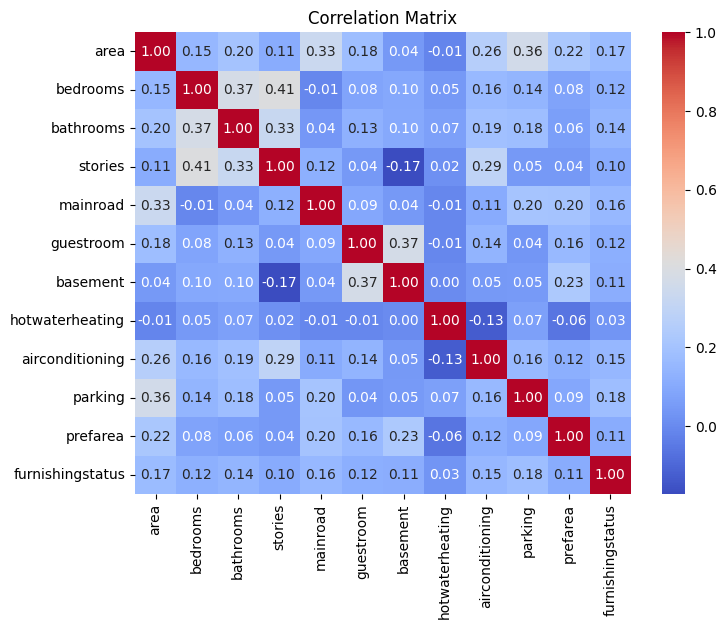

                      area  bedrooms  bathrooms   stories  mainroad  \
area              1.000000  0.150460   0.202610  0.108145  0.331604   
bedrooms          0.150460  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.202610  0.373930   1.000000  0.326165  0.042398   
stories           0.108145  0.408564   0.326165  1.000000  0.121706   
mainroad          0.331604 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.180190  0.080549   0.126469  0.043538  0.092337   
basement          0.043305  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating  -0.013725  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.262423  0.160603   0.186915  0.293602  0.105423   
parking           0.360774  0.139270   0.177496  0.045547  0.204433   
prefarea          0.219706  0.079023   0.063472  0.044425  0.199876   
furnishingstatus  0.167420  0.123244   0.143559  0.104672  0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
a

In [17]:
# investigating Colinearity:
# Calculate the correlation matrix
df_cor = df.copy()
params = df_cor.columns.tolist()
params.remove('price')
paramers = df_cor[params]
paramers.head()
correlation_matrix = paramers.corr()

# Visualize the correlation matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Print the correlation matrix
print(correlation_matrix)

In [18]:
# Feature engineering: Adding new features
# Adding a new feature 'bedroom_per_stories'
#df['bedroom_per_stories'] = df['bedrooms'] / df['stories']

In [19]:
# # Feature engineering: PCA
# # Scaling the numerical features
# PCA_df = df[['price', 'area']]
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(PCA_df)
# df_scaled = pd.DataFrame(data=df_scaled, columns=['price', 'area'])
# df = df.drop(columns=['price', 'area'])
# df_scaled_all = pd.concat([df_scaled, df], axis=1)
# df_scaled_X = df_scaled_all.drop(columns=['price'])

# pca = PCA(n_components=3)
# PCA_df_scaled_arr = pca.fit_transform(df_scaled_X)

# PCAs = []

# for i in range(PCA_df_scaled_arr.shape[1]):
#     PCAs.append(f'PCA{i+1}')
    
# PCA_df_scaled = pd.DataFrame(data=PCA_df_scaled_arr, columns=PCAs)
# PCA_df_scaled

In [20]:
# # Figuring out the best features
# # ... (PCA code from previous examples) ...

# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance = explained_variance_ratio.cumsum()

# # Scree Plot
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()

# # Cumulative Explained Variance Plot
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance')
# plt.show()

# # Example: Keep components explaining at least 90% of the variance
# n_components = np.argmax(cumulative_variance >= 0.90) + 1  # +1 for 1-based indexing
# print(f"Number of components to keep for 90% variance: {n_components}")
# pca_90 = PCA(n_components=0.90) # directly specify the variance in the PCA call
# X_pca_90 = pca_90.fit_transform(df_scaled_X)

In [21]:
# Feature engineering: Regularization
# Scaling the numerical features
Scale_df = df[['price', 'area']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Scale_df)
df_scaled = pd.DataFrame(data=df_scaled, columns=['price', 'area'])
df = df.drop(columns=['price', 'area'])
df_scaled_all = pd.concat([df_scaled, df], axis=1)
df_scaled_X = df_scaled_all.drop(columns=['price'])

X_scaled = df_scaled_X
y = df_scaled_all['price']

# # Regularization using Lasso1
# lasso = Lasso(alpha=0.3)  # Tune alpha! Start with a small value and increase if needed.
# lasso.fit(X, y)

# # Regularization using Ridge
# ridge = Ridge(alpha=1.0)  # Tune alpha!
# ridge.fit(X, y)

In [23]:
#Univariate Linear Regression

model = LinearRegression()
model.fit(X_scaled[['area']], y)
y_pred = model.predict(X_scaled[['area']])

r2 = r2_score(y, y_pred)
print(f"R-squared of Univariate Linear Regression: {r2}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error of Univariate Linear Regression: {mse}")

R-squared of Univariate Linear Regression: 0.33649906166120647
Mean Squared Error of Univariate Linear Regression: 0.6635009383387935


In [24]:
#Multivariate Linear Regression

model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

r2 = r2_score(y, y_pred)
print(f"R-squared of Multivariate Linear Regression: {r2}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error of Multivariate Linear Regression: {mse}")

R-squared of Multivariate Linear Regression: 0.7005416693434587
Mean Squared Error of Multivariate Linear Regression: 0.2994583306565412


In [ ]:
raise KeyError

In [25]:
# #polynomial linear regression
# degree = 2  # Degree of the polynomial
# poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
# X_train_poly = poly.fit_transform(X1)
# X = X_train_poly
# #X_test_poly = poly.transform(X_test) # Use the same poly transformer as train data to transform test data

# # 3. Train a Linear Regression Model
# model = LinearRegression()
# model.fit(X, y_train)

# # 4. Make Predictions
# y_pred = model.predict(X)


# r2 = r2_score(y_train, y_pred)
# print(f"R-squared_train: {r2}")

# mse = mean_squared_error(y_train, y_pred)
# print(f"Mean Squared Error_train: {mse}")

# X_val_poly = poly.fit_transform(X_val)
# y_pred_val = model.predict(X_val_poly)
# r2 = r2_score(y_val, y_pred_val)
# print(f"R-squared_train_val: {r2}")

# mse = mean_squared_error(y_val, y_pred_val)
# print(f"Mean Squared Error_train_val: {mse}")

# X_test_poly = poly.fit_transform(X_test)
# y_pred_test = model.predict(X_test_poly)
# r2 = r2_score(y_test, y_pred_test)
# print(f"R-squared_train_val_test: {r2}")

# mse = mean_squared_error(y_test, y_pred_test)
# print(f"Mean Squared Error_train_val_test: {mse}")


In [26]:
# degree = 2  # Start with lower degree given data size
# model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# scores = cross_val_score(model, X1, y, cv=5)
# scores


In [27]:

def compare_polynomial_degrees(X, y, max_degree=5):
    degrees = range(1, max_degree + 1)
    mean_scores = []
    std_scores = []
    
    for degree in degrees:
        # Create polynomial regression model
        model = make_pipeline(
            PolynomialFeatures(degree),
            LinearRegression()
        )
        
        # Perform cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        
        # Store mean and std of scores
        mean_scores.append(np.mean(scores))
        std_scores.append(np.std(scores))
        
        print(f"\nDegree {degree}:")
        print(f"Mean R² score: {mean_scores[-1]:.3f} (+/- {std_scores[-1] * 2:.3f})")
        print(f"Individual fold scores: {scores}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.errorbar(degrees, mean_scores, yerr=std_scores, fmt='-o')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.title('Polynomial Regression: Degree vs R² Score')
    plt.grid(True)
    
    return degrees, mean_scores, std_scores


In [ ]:
print(compare_polynomial_degrees(X1, y, max_degree=5))

In [29]:
# for degree in range(1, 12):
#     poly = PolynomialFeatures(degree=degree, include_bias=False)
#     X_train_poly = poly.fit_transform(X1)
#     X = X_train_poly
#     model = LinearRegression()
#     model.fit(X, y)
#     y_pred = model.predict(X)
#     print(f"Degree: {degree}")
#     print(f"R2 Score: {r2_score(y, y_pred)}")
#     print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred))}")
#     print()

In [30]:
# alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# for alpha in alphas:
#     ridge = Ridge(alpha=alpha)
#     ridge.fit(X, y)
#     y_pred = ridge.predict(X)
#     r2 = r2_score(y, y_pred)
#     print(f"Alpha: {alpha}, r2: {r2}")

In [ ]:
y = y_test
y_pred = y_pred_test


r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()

In [ ]:
# Residuals (errors)
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()